In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [30]:
df = pd.read_csv('output/please_final4.csv', encoding='utf8')

In [92]:
# 전진단계별 선택법

variables = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-92-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-92-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-92-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-92-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 

In [93]:
selected_variables

['공공시설_5분이내거리최소',
 '지하철 역_5분이내수',
 '기온',
 '숙박_5분이내거리최대',
 '숙박_5분이내수',
 '청소년 수련시설_5분이내거리최소',
 '공공시설_5분이내거리평균',
 '청소년 수련시설_5분이내거리평균',
 '공공시설_5분이내거리최대',
 '청소년 수련시설_5분이내거리최대',
 '생활서비스_5분이내거리최소',
 '강수형태',
 '풍속']

In [105]:
# 전체역

x = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]

x_adjust = df[['공공시설_5분이내거리최소',
 '지하철 역_5분이내수',
 '기온',
 '숙박_5분이내거리최대',
 #'숙박_5분이내수',
 '청소년 수련시설_5분이내거리최소',
 #'공공시설_5분이내거리평균',
 #'청소년 수련시설_5분이내거리평균',
 #'공공시설_5분이내거리최대',
 #'청소년 수련시설_5분이내거리최대',
 '생활서비스_5분이내거리최소',
 '강수형태',
 '풍속']] # 선택

display(x_adjust)

,공공시설_5분이내거리최소,지하철 역_5분이내수,기온,숙박_5분이내거리최대,청소년 수련시설_5분이내거리최소,생활서비스_5분이내거리최소,강수형태,풍속
0,0.005,1,6.563172,0.003611,0.005,0.000315,0.036290,0.944220
1,0.005,1,13.501667,0.003611,0.005,0.000315,0.055556,1.083333
2,0.005,1,18.493280,0.003611,0.005,0.000315,0.037634,0.996102
3,0.005,1,22.890278,0.003611,0.005,0.000315,0.000000,0.988056
4,0.005,1,26.819086,0.003611,0.005,0.000315,0.000000,0.983333
...,...,...,...,...,...,...,...,...
205,0.005,0,26.125672,0.005000,0.005,0.000418,0.034946,0.310081
206,0.005,0,21.795417,0.005000,0.005,0.000418,0.086111,0.453750
207,0.005,0,14.989516,0.005000,0.005,0.000418,0.044355,0.413441
208,0.005,0,5.799861,0.005000,0.005,0.000418,0.061111,0.443889


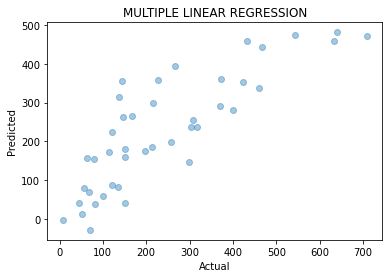

,공공시설_5분이내거리최소,지하철 역_5분이내수,기온,숙박_5분이내거리최대,청소년 수련시설_5분이내거리최소,생활서비스_5분이내거리최소,강수형태,풍속
147,0.005,0,14.989516,0.003817,0.005,0.000114,0.044355,0.413441
111,0.005,1,10.810694,0.004017,0.005,0.000379,0.041667,0.545139
9,0.005,1,-1.099597,0.003611,0.005,0.000315,0.182796,1.091129
117,0.005,1,14.989516,0.004017,0.005,0.000379,0.044355,0.413441
120,0.005,0,6.563172,0.003817,0.005,0.000114,0.036290,0.944220


,공공시설_5분이내거리최소,지하철 역_5분이내수,기온,숙박_5분이내거리최대,청소년 수련시설_5분이내거리최소,생활서비스_5분이내거리최소,강수형태,풍속
14,0.005,1,27.078763,0.003611,0.005,0.000315,0.094086,0.740054
169,0.005,0,-1.892876,0.002963,0.005,0.001235,0.045699,0.951210
124,0.005,0,26.819086,0.003817,0.005,0.000114,0.000000,0.983333
193,0.005,0,22.888056,0.005000,0.005,0.000418,0.098611,0.987361
209,0.005,0,0.376075,0.005000,0.005,0.000418,0.072581,0.525672


0.7155342274662604


In [106]:
#x_train, x_test, y_train, y_test = train_test_split(x_adjust3, y, train_size=0.8, test_size=0.2)
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_adjust, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
display(x_train.head())
display(x_test.head())
print(mlr.score(x_train, y_train))

In [107]:
# 최종 변수 선택

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

model = smf.ols(formula = '자전거대여량 ~ x_adjust', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 자전거대여량   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     84.00
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.67e-52
Time:                        16:07:18   Log-Likelihood:                -1248.1
No. Observations:                 210   AIC:                             2510.
Df Residuals:                     203   BIC:                             2534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     373.8242     40.502      9.230      0.000     293.966     453.682
x_adjust[0]     1.8691      0.203      9.230      0.000       1.470       2.268
x_adjust[1]   210.9219     13.616     15.490      0.000     184.075     237.769
x_adjust[2]     5.9452      0.780      7.626      0.000       4.408       7.482
x_adjust[3] -6.063e+04   7038.162     -8.615      0.000   -7.45e+04   -4.68e+04
x_adjust[4]     1.8691      0.203      9.230      0.000       1.470       2.268
x_adjust[5] -4.865e+04   1.93e+04     -2.517      0.013   -8.68e+04   -1.05e+04
x_adjust[6]   401.4249    154.676      2.595      0.010      96.448     706.402
x_adjust[7]  -137.4808     23.213     -5.923      0.000    -183.250     -91.712
==============================================================================
Omnibus:                        3.934   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                4.865
Skew:                           0.037   Prob(JB):                       0.0878
Kurtosis:                       3.742   Cond. No.                     1.56e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-38. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\XNOTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


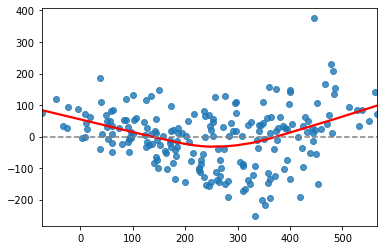

In [112]:
# 모형의 선형성

fitted = result.predict(df)
residual = df['자전거대여량'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')

C:\Users\XNOTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


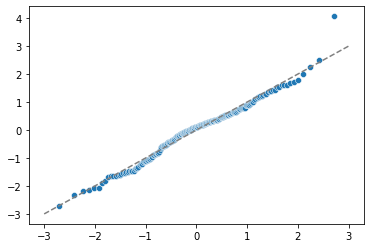

In [113]:
# 잔차의 정규성

import scipy.stats

sr = scipy.stats.zscore(residual)
(x,y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3], [-3,3], '--', color='grey')

C:\Users\XNOTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

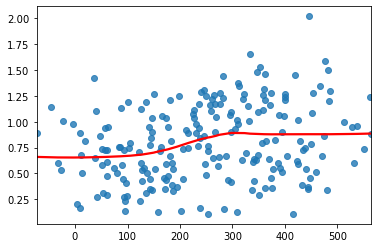

In [114]:
# 잔차의 등분산성

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

In [111]:
#Train the MLR / 회귀모델적합

fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()
 
#R-Squre 가 높고 , 대부분의 변수들이 유의함.
print(fittedFullModel.summary())
 
#VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_adjust.values,i)
                     for i in range(x_adjust.shape[1])]
vif["features"]=x_adjust.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:                 자전거대여량   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     67.50
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.95e-41
Time:                        16:07:20   Log-Likelihood:                -996.46
No. Observations:                 168   AIC:                             2007.
Df Residuals:                     161   BIC:                             2029.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
공공시설_5분이내거리최소      3.724e+04   4458.01